In [1]:
import pandas as pd

# products = pd.read_csv('./products.csv')
products = pd.read_csv('./products_join_categories.csv')

products.sample(10)

,Unnamed: 0,productId,name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
125455,125455,125455,胡林翼家书,"832,519,599",832,图书音像,519,文学艺术,599.0,文学类
161273,161273,161273,什么样的人生是值得追求的,"832,1101,379",832,图书音像,1101,少儿/教育图书,379.0,教材
273413,273413,273413,SAMSUNG 三星 Galaxy Camera S4 zoom (C101手机) 智能数码...,"1128,31,1019",1128,手机/数码,31,摄影摄像,1019.0,数码相机
380217,380217,380217,海洋保护区:概念与应用,"832,1096,474",832,图书音像,1096,科技类图书,474.0,自然科学
228440,228440,228440,运筹学(第3版)(附光盘1张),"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试
298772,298772,298772,明文徵明书《千字文》《张一川小传》,"832,723,1052",832,图书音像,723,人文社科类图书,1052.0,古籍
253431,253431,253431,剑桥少儿英语:书写天天练(1级????上册)(第5版),"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试
391383,391383,391383,张祖翼经典藏拓系列(唐碑????第1辑):唐李信墓志,"832,519,1076",832,图书音像,519,文学艺术,1076.0,艺术
340602,340602,340602,玉友 特价开光新疆和田玉器青玉保平玉观音挂件 男款吊坠玉佩 (免费附送国家级权威珠宝鉴定证书),"486,546,5",486,钟表/首饰/眼镜/礼品,546,珠宝/钻石/翡翠/黄金,5.0,天然琥珀/珍珠/玉石
135614,135614,135614,让你豁然开朗的心理逆转术,"832,665,45",832,图书音像,665,生活类图书,45.0,亲子/家教


In [2]:
# chunksize = 500000
# col_names =  ['userId', 'productId', 'rating']
# final  = pd.DataFrame(columns = col_names)
# totalRows = 0
# for chunk in pd.read_csv('D:/step/ratings.csv', chunksize=chunksize):
#     del chunk['timestamp']
#     del chunk['comment']
#     del chunk['title']
#     final = pd.concat([final,chunk])
#     totalRows+=chunk.shape[0]
#     print("processing the first " + str(totalRows) + " rows" )
    
# print("Origin TotalRow is totalRows " + str(totalRows) )
# print( "After process , the totalRow is " + str(final.shape[0]) )
# final.head()
# final.to_csv('D:/step/ratings_drop.csv', encoding="utf_8_sig")

In [2]:
categories = pd.read_csv( './categories.csv')

print('Category types：%d' % categories.shape[0])
categories.set_index('catId', inplace=True)

Category types：1175


In [11]:
# for idr, row in products.iterrows():
#     split = row['catIds'].split(",") 
#     for i in range(len(split)):
#         products.at[idr, 'cat'+str(i+1)] = split[i]
#         products.at[idr, 'cat'+str(i+1)+'_name'] = categories.loc[int(split[i])]['category']

# products.to_csv('./products_join_categories.csv', encoding="utf_8_sig")
# products.head(10)

,productId,name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
0,0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923,进口图书
1,1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086,少儿
2,2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739,工具书
3,3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923,进口图书
4,4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086,少儿
5,5,Caps for Sale Book and CD,"832,476,923",832,图书音像,476,其它图书,923,进口图书
6,6,The Gulag Archipelago Volume 3: An Experiment ...,"832,476,923",832,图书音像,476,其它图书,923,进口图书
7,7,150 Best Bathroom Ideas,"832,476,923",832,图书音像,476,其它图书,923,进口图书
8,8,The Forgotten Warrior,"832,476,923",832,图书音像,476,其它图书,923,进口图书
9,9,Free Fall,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086,少儿


In [3]:
print("Product count: %d" % products.shape[0])
print("Null in cat1: %d" % products['cat1'].isnull().sum())
print("Null in cat2: %d" % products['cat2'].isnull().sum())
print("Null in cat3: %d" % products['cat3'].isnull().sum())

Product count: 525619
Null in cat1: 0
Null in cat2: 0
Null in cat3: 1202


Text(0.5, 0, 'cat1')

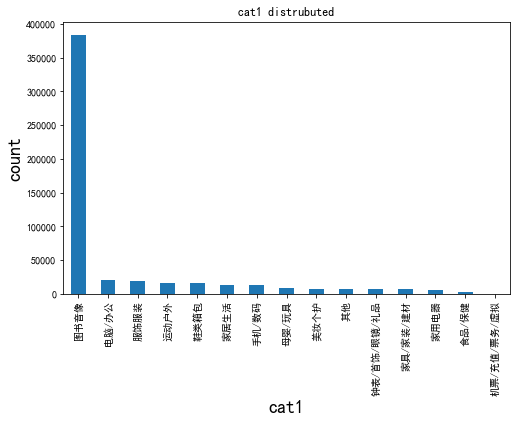

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

d = {'cat1':products['cat1_name'].value_counts().index, 'count': products['cat1'].value_counts()}
df_cat1 = pd.DataFrame(data=d).reset_index(drop=True)

df_cat1.plot(x='cat1', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("cat1 distrubuted")
plt.ylabel('count', fontsize=18)
plt.xlabel('cat1', fontsize=18)

Text(0.5, 0, 'cat2')

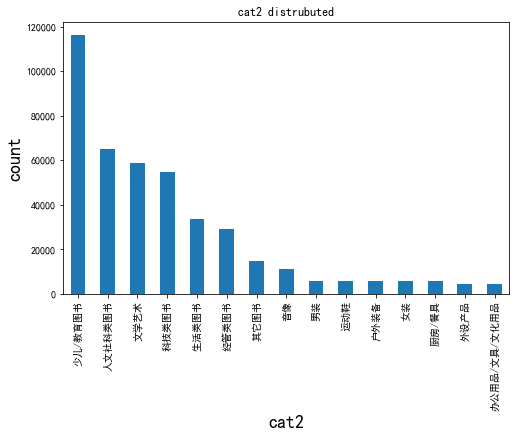

In [21]:
d = {'cat2':products['cat2_name'].value_counts().index, 'count': products['cat2'].value_counts()}
df_cat2 = pd.DataFrame(data=d).reset_index(drop=True)
df_cat2 = df_cat2.sort_values(by="count",ascending= False).head(15)

df_cat2.plot(x='cat2', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("cat2 distrubuted")
plt.ylabel('count', fontsize=18)
plt.xlabel('cat2', fontsize=18)

Text(0.5, 0, 'cat3')

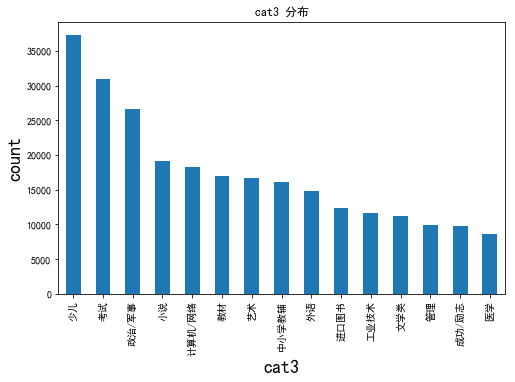

In [22]:
d = {'cat3':products['cat3_name'].value_counts().index, 'count': products['cat3'].value_counts()}
df_cat3 = pd.DataFrame(data=d).reset_index(drop=True)
df_cat3 = df_cat3.sort_values(by="count",ascending= False).head(15)

df_cat3.plot(x='cat3', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("cat3 分布")
plt.ylabel('count', fontsize=18)
plt.xlabel('cat3', fontsize=18)

In [37]:
import re
import jieba as jb

product_lists = products[['productId','name']]

def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    r = '[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+'
    line = re.sub(r, '', line)
    return line


product_lists['clean_name'] = product_lists['name'].apply(remove_punctuation)

# cut word
# GitBub: https://github.com/fxsjy/jieba
product_lists['cut_name'] = product_lists['clean_name'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w !=' ']))
# product_lists.to_csv('./product_list_cut.csv', encoding="utf_8_sig")
product_lists.head()


Building prefix dict from the default dictionary ...
Loading model from cache D:\System\Windows\TEMP\jieba.cache
Loading model cost 0.652 seconds.
Prefix dict has been built succesfully.


,productId,name,clean_name,cut_name
0,0,CSSMs Biology: Control in Cells and in Organis...,CSSMs Biology Control in Cells and in Organism...,CSSMs Biology Control in Cells and in Organism...
1,1,Treasure Island,Treasure Island,Treasure Island
2,2,Collins Primary Dictionaries – Collins Junior ...,Collins Primary Dictionaries – Collins Junior ...,Collins Primary Dictionaries – Collins Junior ...
3,3,Partners in Crime,Partners in Crime,Partners in Crime
4,4,The Hobbit,The Hobbit,The Hobbit


In [3]:
product_lists = pd.read_csv('./product_list_cut.csv')
product_lists.head()

,Unnamed: 0,productId,name,clean_name,cut_name
0,0,0,CSSMs Biology: Control in Cells and in Organis...,CSSMs Biology Control in Cells and in Organism...,CSSMs Biology Control in Cells and in Organism...
1,1,1,Treasure Island,Treasure Island,Treasure Island
2,2,2,Collins Primary Dictionaries – Collins Junior ...,Collins Primary Dictionaries – Collins Junior ...,Collins Primary Dictionaries – Collins Junior ...
3,3,3,Partners in Crime,Partners in Crime,Partners in Crime
4,4,4,The Hobbit,The Hobbit,The Hobbit


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

import plotly.graph_objs as go
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

def get_top_n_words(corpus, n=None, ngram = 1):
    vec = CountVectorizer(ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq, words_freq[:n]

In [6]:
words_freq, common_words = get_top_n_words(product_lists['cut_name'], 20)
df1 = pd.DataFrame(common_words, columns = ['cut_name' , 'count'])
df1.groupby('cut_name').sum()['count'].sort_values().iplot(kind='barh', xTitle='Count', linecolor='black', title='Most common 20 words in name')

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [6]:
with open("./baidu_stopwords.txt", encoding='utf-8') as f:
    stop_words = f.read()
    
stop_words = stop_words.split("\n")

In [7]:
words_fre = pd.DataFrame(words_freq, columns = ['cut_name' , 'count'])
words_freq_cut = words_fre[~words_fre.cut_name.isin(stop_words)]
common_words_cut = words_freq_cut[:20]

print("Before cut the stop words: %d" % len(words_freq))
print("After cut the stop words: %d" % len(words_freq_cut))
print("Cut %d stop words" % (len(words_freq) - len(words_freq_cut)))

Before cut the stop words: 248752
After cut the stop words: 247924
Cut 828 stop words


In [8]:
df2 = pd.DataFrame(common_words_cut, columns = ['cut_name' , 'count'])
df2.groupby('cut_name').sum()['count'].sort_values().iplot(kind='barh', xTitle='Count', linecolor='black', title='Most common 20 words in name after filter stop words')

In [ ]:
common_words3 = get_top_n_words(product_lists['cut_name'], 20, 2)
df3 = pd.DataFrame(common_words3, columns = ['cut_name' , 'count'])
df3.groupby('cut_name').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='最常用的20个Bigrams词语对')

False